# Employment by Occupation

Making pie charts of occupation type for certain regions

Data is from:

<https://www.ons.gov.uk/datasets/TS060/editions/2021/versions/1>

from page 

<https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/employmentandemployeetypes/bulletins/industryandoccupationenglandandwales/census2021>

Here, enter the location by `Lower Tier Local Authorities` name.

In [7]:
import matplotlib.pyplot as plt
import matplotlib
import pandas
import random
import numpy

CSVFILE = "TS060-2021-1.csv"

# LOCATION =  "Cheltenham"
# LOCATION =  "Cambridge"
# LOCATION =  "Kingston upon Hull"
# LOCATION =  "Sheffield"
LOCATION =  "Newham"

Read the CSV file, and re-index it on the Industry type

In [8]:
df = pandas.read_csv(CSVFILE)
df.set_index('Industry (current) (88 categories)', inplace=True)
df.head()

,Lower Tier Local Authorities Code,Lower Tier Local Authorities,Industry (current) (88 categories) Code,Observation
Industry (current) (88 categories),,,,
Does not apply,E06000001,Hartlepool,-8,54589
"01 Crop and animal production, hunting and related service activities",E06000001,Hartlepool,1,117
02 Forestry and logging,E06000001,Hartlepool,2,0
03 Fishing and aquaculture,E06000001,Hartlepool,3,32
05 Mining of coal and lignite,E06000001,Hartlepool,4,5


Filter to only the local authority we want (with `LOCATION` from above)

Also drop the "Does not apply" column. I expect this is "people who are not able to work (child or retired)"

In [9]:
localdf = df[df["Lower Tier Local Authorities"] == LOCATION]
DNA_number = localdf["Observation"]["Does not apply"]
# drop DOES NOT APPLY
localdf = localdf.drop("Does not apply")
total_applies = localdf["Observation"].sum()
print(f"{DNA_number}  does not apply")
localdf.head()

187591  does not apply


,Lower Tier Local Authorities Code,Lower Tier Local Authorities,Industry (current) (88 categories) Code,Observation
Industry (current) (88 categories),,,,
"01 Crop and animal production, hunting and related service activities",E09000025,Newham,1,96
02 Forestry and logging,E09000025,Newham,2,3
03 Fishing and aquaculture,E09000025,Newham,3,6
05 Mining of coal and lignite,E09000025,Newham,4,4
06 Extraction of crude petroleum and natural gas,E09000025,Newham,5,64


Group categories which have less than 1% of the occupation share into "Other"

In [10]:
SOME_THRESHOLD = total_applies / 100

def combine_other(row):
    if row["Observation"] < SOME_THRESHOLD:
        return 'Other'
    return row.name

localdf.loc[:, 'combined_label'] = localdf.apply(combine_other, axis=1)

pdf = localdf.groupby('combined_label').sum(numeric_only=True)
pdf.tail()


,Industry (current) (88 categories) Code,Observation
combined_label,,
86 Human health activities,75,12904
88 Social work activities without accommodation,77,5398
"90 Creative, arts and entertainment activities",78,1852
96 Other personal service activities,84,1906
Other,2508,23542


Set up a list of colours we can index by occupation type, so that colours stay the same across pie charts for different `LOCATION`s

In [11]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colours = list(matplotlib.colors.cnames.items())
random.seed(21412562)
random.shuffle(colours)
colours = colours[:-1]

plot!

make one pie chart for occupations, and one for "does not apply", to show context. The latter is scaled according to the square-root of the ratio of "Does not apply" to the rest of the data

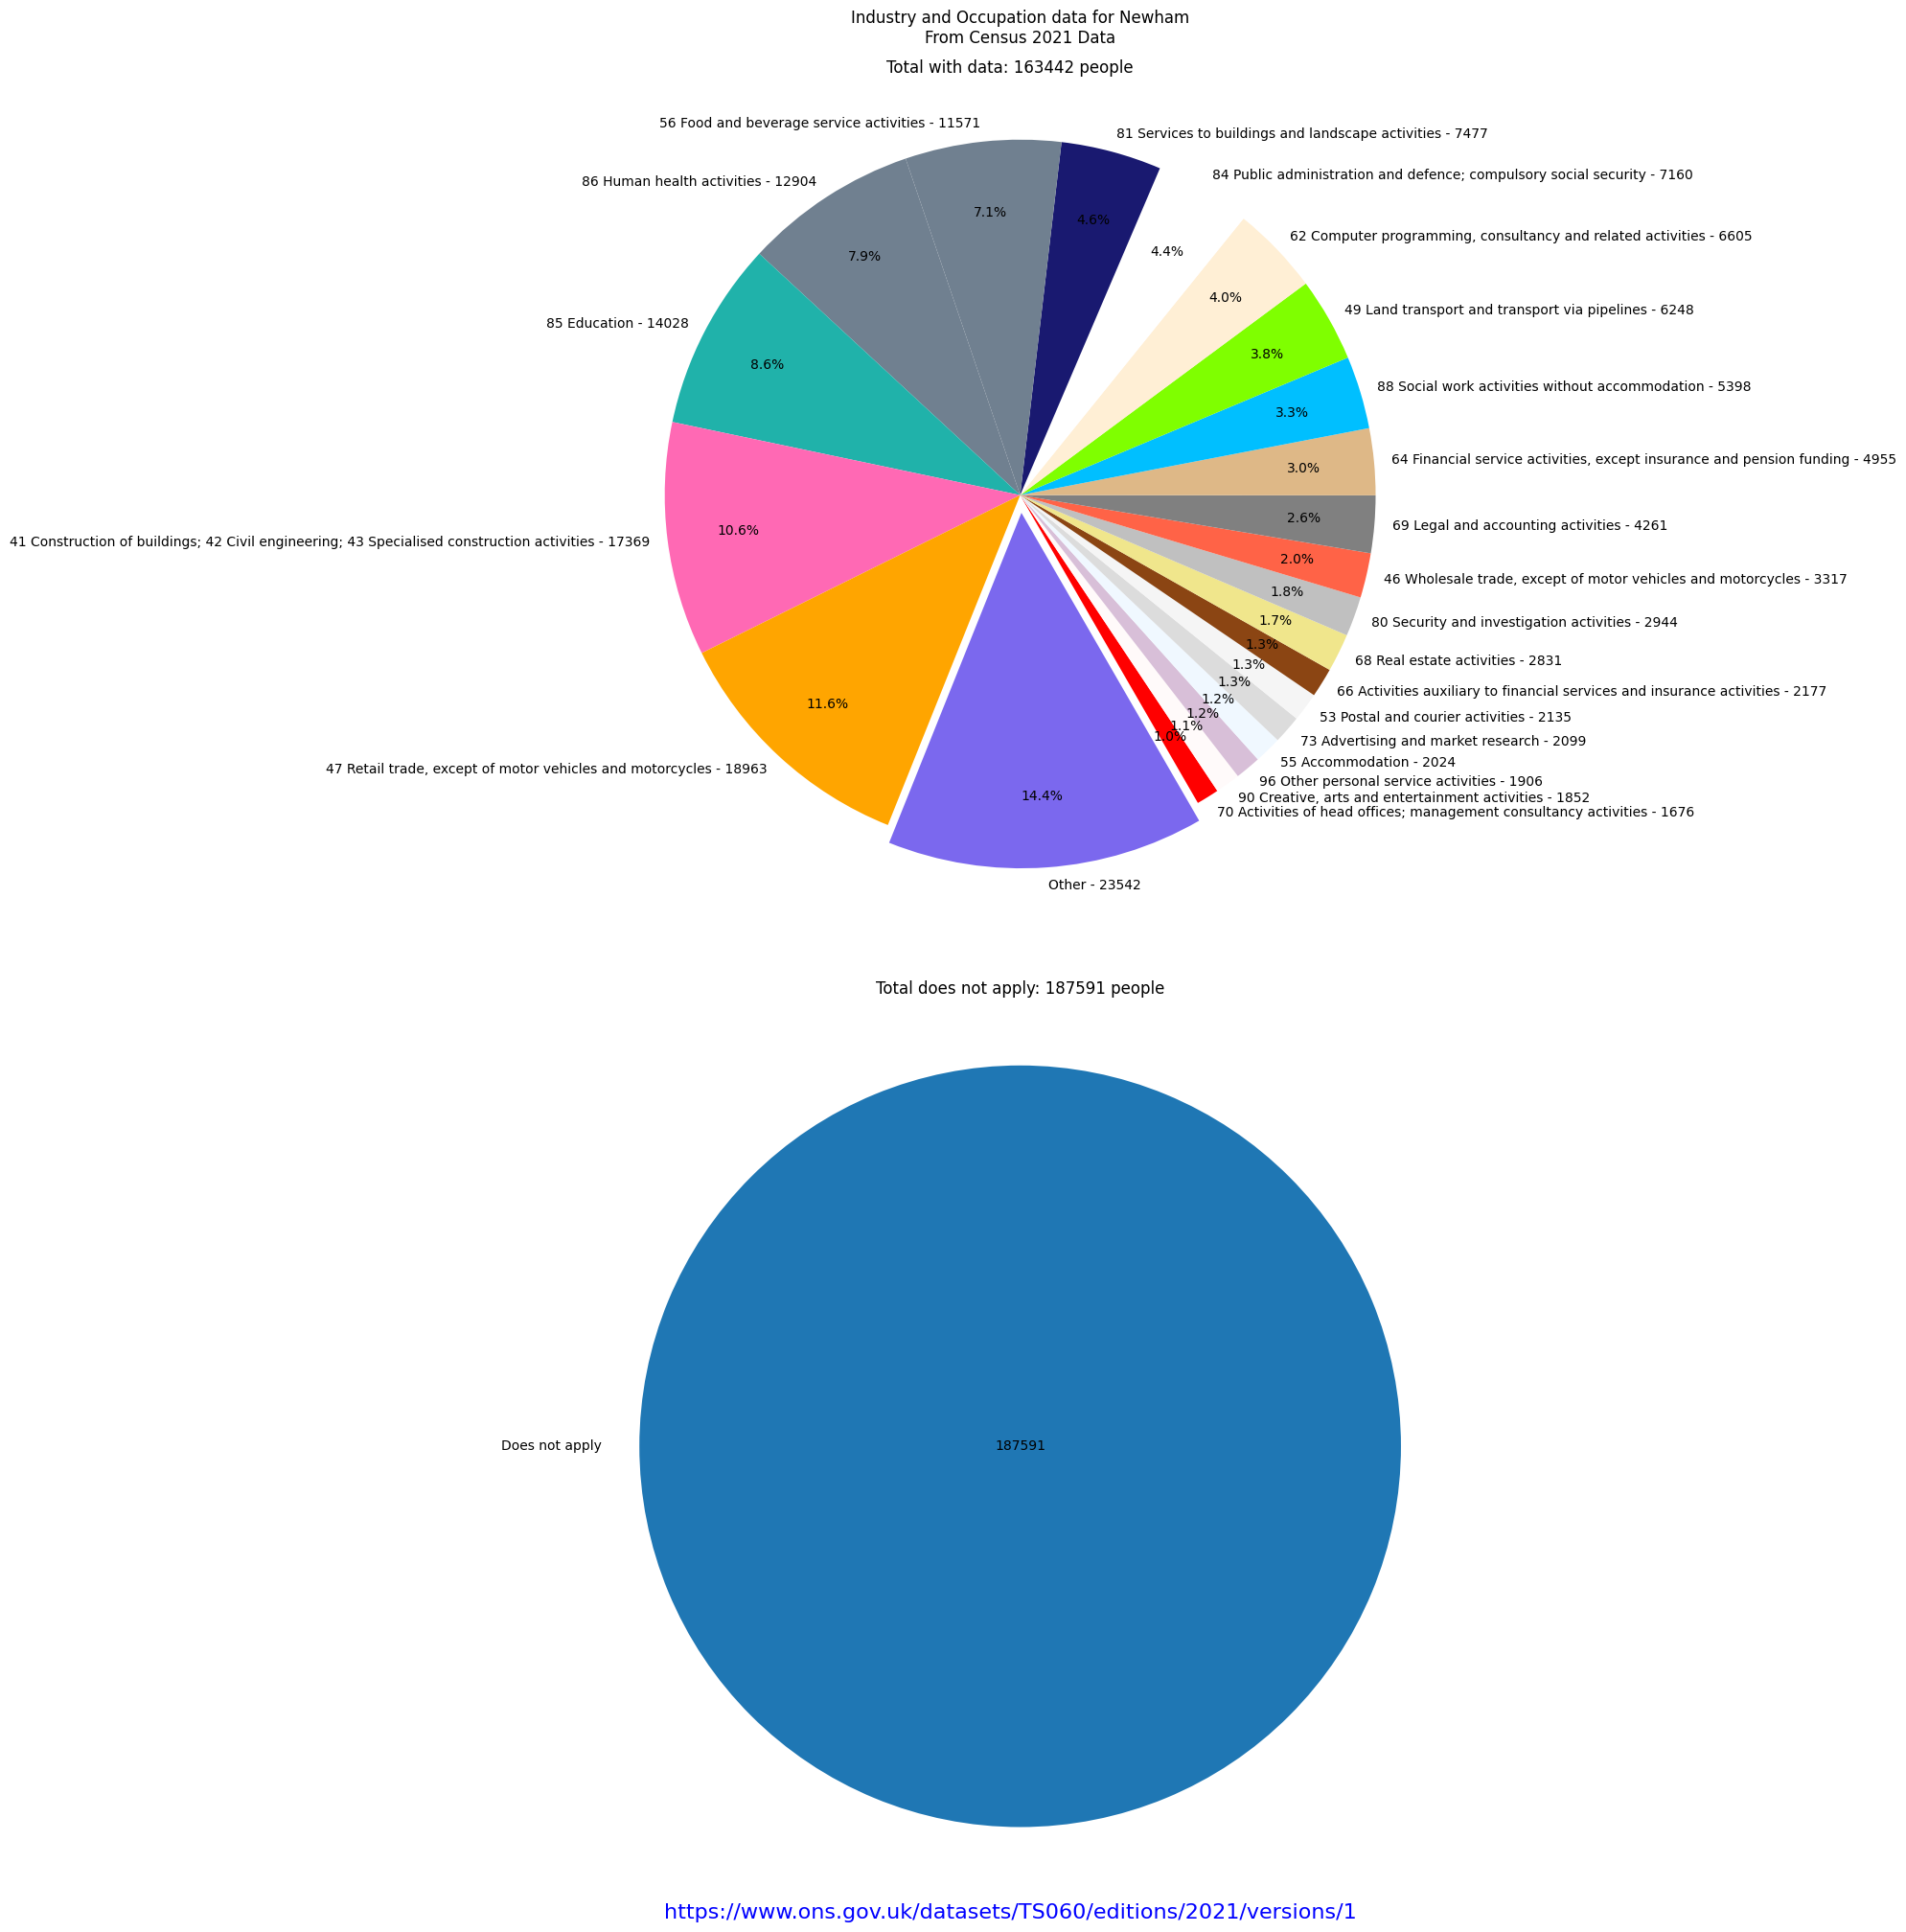

In [13]:

pdf = pdf.sort_values(by="Observation")

fig = plt.figure(figsize=(10, 20))
ax, ax2 = fig.subplots(2, 1)
fig.tight_layout()

obscolours = []
for i in pdf["Industry (current) (88 categories) Code"]:
    if i > len(colours):
        c = colours[0][1]
    else:
        c = colours[i % len(colours)][1]
    obscolours.append(c)

ax.pie(
    pdf["Observation"],
    labels=[f"{ind} - {pdf['Observation'][ind]}" for ind in pdf.index],
    autopct='%.1f%%',
    colors=obscolours,
    explode=[0.05 if b == "Other" else 0 for b in pdf.index],
    pctdistance=0.8,
    labeldistance=1.05,
    startangle=-60,
    radius=1,
)

ratio = DNA_number / total_applies

ax2.pie(
    [DNA_number],
    labels=["Does not apply"],
    radius=numpy.sqrt(ratio),
    autopct=lambda pct: DNA_number,
    pctdistance=0,
)

ax.set_title(f"Industry and Occupation data for {LOCATION}\nFrom Census 2021 Data")
ax2.set_title(f"Total does not apply: {DNA_number} people")
plt.suptitle(f"Total with data: {total_applies} people")

plt.figtext(
  0.5,
  0.01,
  "https://www.ons.gov.uk/datasets/TS060/editions/2021/versions/1",
  ha="center",
  fontsize=16,
  url='https://www.ons.gov.uk/datasets/TS060/editions/2021/versions/1',
  color="blue",
)

plt.savefig(
    f"{LOCATION}_occupation_pie.svg",
    bbox_inches="tight",
)

plt.show()
